# 메인교재 PART 7 - 머신러닝 데이터 분석

## 단순회귀분석

In [1]:
# 예제 7-1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 10)
print(df.head())   
print('\n')

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0  

In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000 

In [3]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)
print(df['horsepower'].unique())          # horsepower 열의 고유값 확인
print('\n')

df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

print(df.describe())                                     # 데이터 통계 요약정보 확인
print('\n')

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1

In [4]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
print(ndf.head())   
print('\n')

    mpg  cylinders  horsepower  weight
0  18.0          8       130.0  3504.0
1  15.0          8       165.0  3693.0
2  18.0          8       150.0  3436.0
3  16.0          8       150.0  3433.0
4  17.0          8       140.0  3449.0




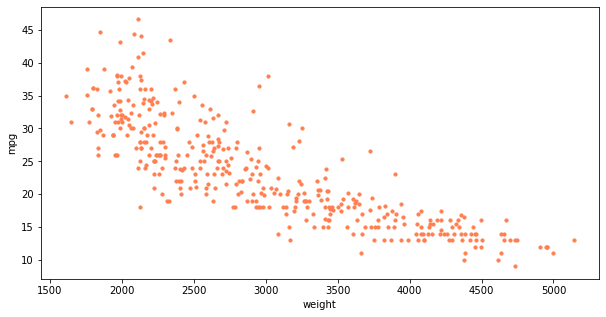

In [5]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

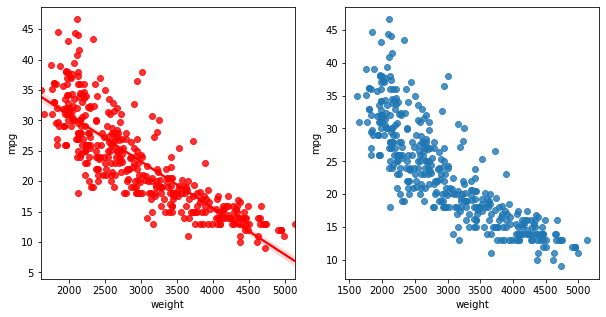

In [6]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1, color="red")                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()
plt.close()

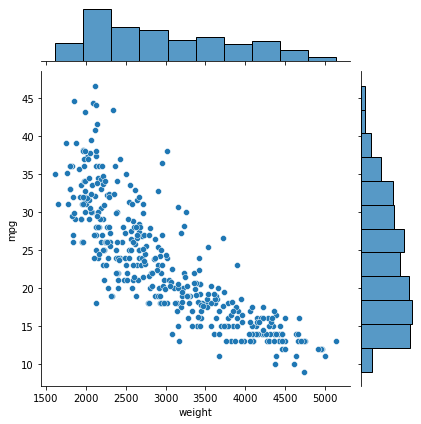

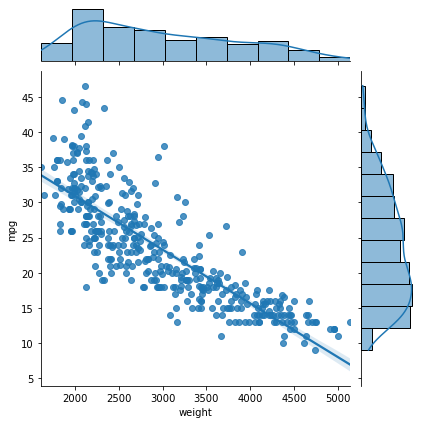

In [7]:
# seaborn 조인트 그래프 - 산점도, 히스토그램
sns.jointplot(x='weight', y='mpg', data=ndf)              # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=ndf)  # 회귀선 표시
plt.show()
plt.close()

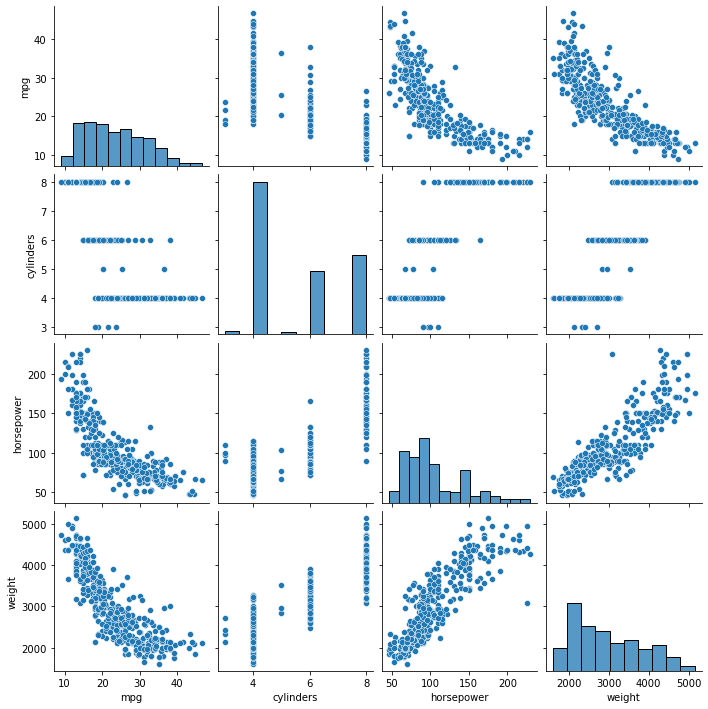

In [8]:
# seaborn pariplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)  
plt.show()
plt.close()

In [11]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']       #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))

train data 개수:  274
test data 개수:  118


In [12]:
'''
Step 5: 단순회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

0.6822458558299325




### 결정계수는 추정한 선형 모형이 주어진 자료에 적합한 정도를 재는 척도 임
### 결정계수의 값은 0에서 1사이에 있으며, 종속변인과 독립변인 사이에 상관관계가 높을수록 1에 가까워짐 
### 결정계수가 0에 가까운 값을 가지는 회귀모형은 유용성이 낮은 반면, 결정계수의 값이 클수록 회귀모형의 유용성이 높다고 판단함

In [13]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('y절편 b', lr.intercept_)
print('\n')


기울기 a:  [-0.00775343]


y절편 b 46.710366257280086




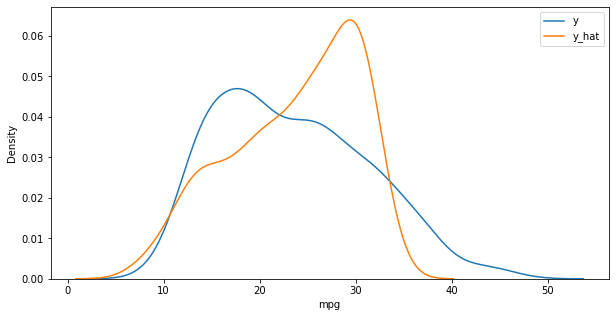

In [14]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X)
plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

## 다항회귀분석

In [15]:
### 예제 7-2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 4] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]

# ndf 데이터를 train data 와 test data로 구분(7:3 비율)
X=ndf[['weight']]  #독립 변수 X
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n')

훈련 데이터:  (274, 1)
검증 데이터:  (118, 1)




In [16]:
'''
Step 5: 비선형회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 필요한 모듈 가져오기 
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree=2)               #2차항 적용
X_train_poly=poly.fit_transform(X_train)     #X_train 데이터를 2차항으로 변형

print('원 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  
print('\n')

원 데이터:  (274, 1)
2차항 변환 데이터:  (274, 3)




In [17]:
# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
X_test_poly = poly.fit_transform(X_test)       #X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,y_test)
print(r_square)
print('\n')

0.7087009262975688




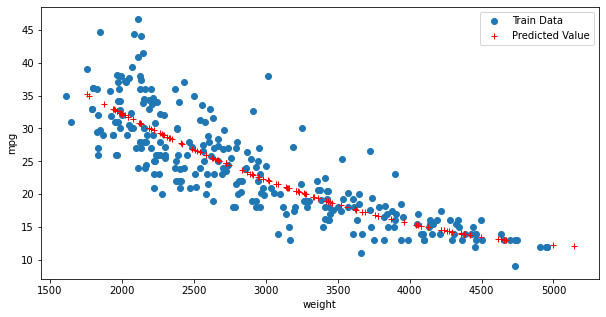

In [18]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat_test = pr.predict(X_test_poly)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

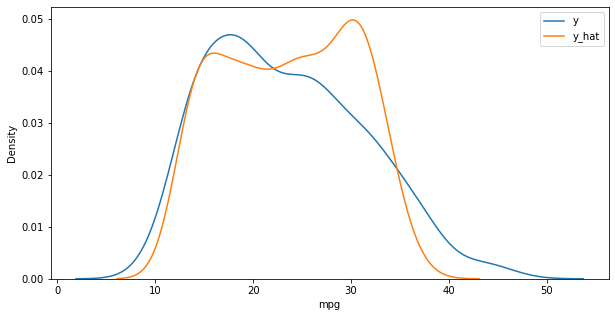

In [19]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y, label="y")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

## 다중회귀분석

In [20]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1 ~ 3] 데이터 준비 
'''
# CSV 파일을 데이터프레임으로 변환
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# horsepower 열의 자료형 변경 (문자열 ->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]


'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['cylinders', 'horsepower', 'weight']]  #독립 변수 X1, X2, X3
y=ndf['mpg']     #종속 변수 Y

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   
print('\n') 

훈련 데이터:  (274, 3)
검증 데이터:  (118, 3)




In [21]:
'''
Step 5: 다중회귀분석 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()   

# train data를 가지고 모형 학습
lr.fit(X_train, y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)
print(r_square)
print('\n')

# 회귀식의 기울기
print('X 변수의 계수 a: ', lr.coef_)
print('\n')

# 회귀식의 y절편
print('상수항 b', lr.intercept_)
print('\n')

0.6939048496695599


X 변수의 계수 a:  [-0.60691288 -0.03714088 -0.00522268]


상수항 b 46.414351269634004




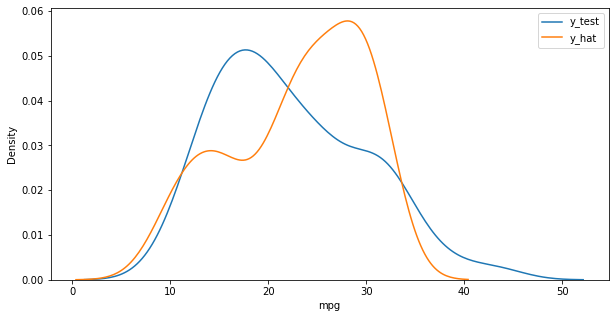

In [22]:
# train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 
y_hat = lr.predict(X_test)

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(y_hat, label="y_hat", ax=ax1)
plt.legend()
plt.show()
plt.close()

## KNN - K Nearest Neighbors

In [23]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비 - Seaborn에서 제공하는 titanic 데이터셋 가져오기
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

# 데이터 살펴보기
print(df.head())   
print('\n')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)
print(df.head())   
print('\n')

   survived  pclass     sex   age  sibsp  ...  adult_male  deck  embark_town  \
0         0       3    male  22.0      1  ...        True   NaN  Southampton   
1         1       1  female  38.0      1  ...       False     C    Cherbourg   
2         1       3  female  26.0      0  ...       False   NaN  Southampton   
3         1       1  female  35.0      1  ...       False     C  Southampton   
4         0       3    male  35.0      0  ...        True   NaN  Southampton   

  alive  alone  
0    no  False  
1   yes  False  
2   yes   True  
3   yes  False  
4    no   True  

[5 rows x 15 columns]


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0 

In [24]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
print(df.info())  
print('\n')

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  
print(rdf.columns.values)
print('\n')

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  
print(len(rdf))
print('\n')

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
print(most_freq)
print('\n')

print(rdf.describe(include='all'))
print('\n')

rdf['embarked'].fillna(most_freq, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'clas

In [25]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]
print(ndf.head())   
print('\n')

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())   
print('\n')

   survived  pclass     sex   age  sibsp  parch embarked
0         0       3    male  22.0      1      0        S
1         1       1  female  38.0      1      0        C
2         1       3  female  26.0      0      0        S
3         1       1  female  35.0      1      0        S
4         0       3    male  35.0      0      0        S


   survived  pclass   age  sibsp  parch  female  male  town_C  town_Q  town_S
0         0       3  22.0      1      0       0     1       0       0       1
1         1       1  38.0      1      0       1     0       1       0       0
2         1       3  26.0      0      0       1     0       0       0       1
3         1       1  35.0      1      0       1     0       0       0       1
4         0       3  35.0      0      0       0     1       0       0       1




In [26]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)

train data 개수:  (499, 9)
test data 개수:  (215, 9)


In [27]:
'''
[Step 5] KNN 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 KNN 분류 모형 가져오기
from sklearn.neighbors import KNeighborsClassifier

# 모형 객체 생성 (k=5로 설정)
knn = KNeighborsClassifier(n_neighbors=5)

# train data를 가지고 모형 학습
knn.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)

[0 0 1 0 0 1 1 1 0 0]
[0 0 1 0 0 1 1 1 0 0]
[[109  16]
 [ 25  65]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       125
           1       0.80      0.72      0.76        90

    accuracy                           0.81       215
   macro avg       0.81      0.80      0.80       215
weighted avg       0.81      0.81      0.81       215



## SVM - Support Vector Machine

In [28]:
### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# load_dataset 함수를 사용하여 데이터프레임으로 변환
df = sns.load_dataset('titanic')

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)


'''
[Step 2] 데이터 탐색/ 전처리
'''

# NaN값이 많은 deck 열을 삭제, embarked와 내용이 겹치는 embark_town 열을 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)  

# age 열에 나이 데이터가 없는 모든 행을 삭제 - age 열(891개 중 177개의 NaN 값)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

# embarked 열의 NaN값을 승선도시 중에서 가장 많이 출현한 값으로 치환하기
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)

In [29]:
'''
[Step 3] 분석에 사용할 속성을 선택
'''

# 분석에 활용할 열(속성)을 선택 
ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

# 원핫인코딩 - 범주형 데이터를 모형이 인식할 수 있도록 숫자형으로 변환
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

In [30]:
'''
[Step 4] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 
       'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']                      #종속 변수 Y

# 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (499, 9)
test data 개수:  (215, 9)




In [31]:
'''
[Step 5] SVM 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 SVM 분류 모형 가져오기
from sklearn import svm

# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf')

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[0 0 1 0 0 0 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]




In [32]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[120   5]
 [ 35  55]]


              precision    recall  f1-score   support

           0       0.77      0.96      0.86       125
           1       0.92      0.61      0.73        90

    accuracy                           0.81       215
   macro avg       0.85      0.79      0.80       215
weighted avg       0.83      0.81      0.81       215



## Decision Tree

In [33]:
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np

'''
[Step 1] 데이터 준비/ 기본 설정
'''

# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(uci_path, header=None)

# 열 이름 지정
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial',
              'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 

#  IPython 디스플레이 설정 - 출력할 열의 개수 한도 늘리기
pd.set_option('display.max_columns', 15)

In [34]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

# bare_nuclei 열의 자료형 변경 (문자열 ->숫자)
print(df['bare_nuclei'].unique())                         # bare_nuclei 열의 고유값 확인
print('\n')

df['bare_nuclei'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int')       # 문자열을 정수형으로 변환

print(df.describe())                                      # 데이터 통계 요약정보 확인
print('\n')

        id  clump  cell_size  cell_shape  adhesion  epithlial bare_nuclei  \
0  1000025      5          1           1         1          2           1   
1  1002945      5          4           4         5          7          10   
2  1015425      3          1           1         1          2           2   
3  1016277      6          8           8         1          3           4   
4  1017023      4          1           1         3          2           1   

   chromatin  normal_nucleoli  mitoses  class  
0          3                1        1      2  
1          3                2        1      2  
2          3                1        1      2  
3          3                7        1      2  
4          3                1        1      2  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   cl

In [35]:
'''
[Step 3] 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial',
      'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']]  #설명 변수 X
y=df['class']                                                   #예측 변수 Y

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)
print('\n')

train data 개수:  (478, 9)
test data 개수:  (205, 9)




In [36]:
'''
[Step 4] Decision Tree 분류 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 Decision Tree 분류 모형 가져오기
from sklearn import tree

# 모형 객체 생성 (criterion='entropy' 적용)
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

# train data를 가지고 모형 학습
tree_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = tree_model.predict(X_test)      # 2: benign(양성), 4: malignant(악성)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

[4 4 4 4 4 4 2 2 4 4]
[4 4 4 4 4 4 2 2 4 4]




In [37]:
# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
tree_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(tree_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
tree_report = metrics.classification_report(y_test, y_hat)            
print(tree_report)

[[127   4]
 [  2  72]]


              precision    recall  f1-score   support

           2       0.98      0.97      0.98       131
           4       0.95      0.97      0.96        74

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



## k-Means

In [38]:
### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

In [39]:
'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]




In [40]:
'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

[0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 2 0 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 2
 0 0 2 2 2 0 0 0 0 0 3 0 0 2 2 0 0 2 2 3 0 2 2 0 3 0 0 2 3 2 0 2 2 2 2 2 0
 0 2 2 0 2 2 2 0 0 2 0 3 3 2 2 2 2 2 3 2 0 2 0 2 2 2 0 0 0 2 2 2 0 0 0 0 2
 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 0 2 0 0 0 2 2 0 0 0 0 2 2 2 0 0 2 0 2 0 2 2 2 2 2 4 2 4 2
 2 2 2 0 0 2 2 2 0 2 2 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 3 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 4 1 1 1 1 1 0 1
 3 1 0 1 1 1 1 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 0 0 2 0 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2]


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656    

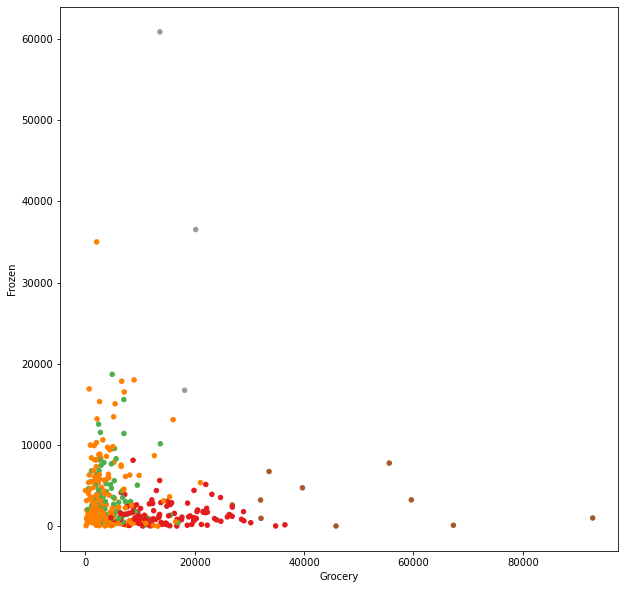

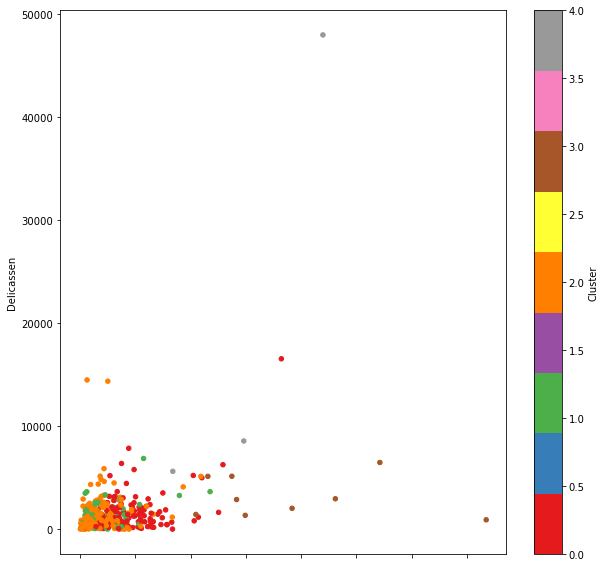

In [41]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

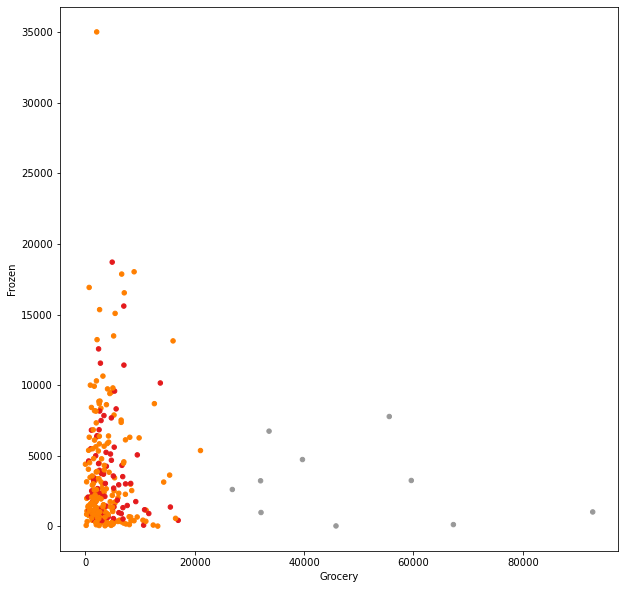

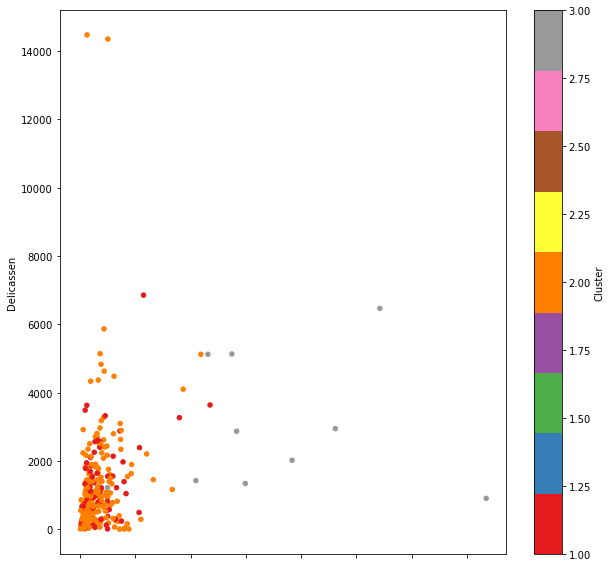

In [42]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, figsize=(10, 10))
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()
plt.close()

## DBSCAN - Density-Based Spatial Clustering of Applications with Noise

In [43]:
### 기본 라이브러리 불러오기
import pandas as pd
import folium


'''
[Step 1] 데이터 준비/ 기본 설정
'''

# 서울시내 중학교 진학률 데이터셋 (출처: 교육???)
file_path = './data/2016_middle_shcool_graduates_report.xlsx'
df = pd.read_excel(file_path, header=0)

# IPython Console 디스플레이 옵션 설정하기
pd.set_option('display.width', None)        # 출력화면의 너비
pd.set_option('display.max_rows', 100)      # 출력할 행의 개수 한도
pd.set_option('display.max_columns', 10)    # 출력할 열의 개수 한도
pd.set_option('display.max_colwidth', 20)   # 출력할 열의 너비
pd.set_option('display.unicode.east_asian_width', True)   # 유니코드 사용 너비 조정

# 열 이름 배열을 출력
print(df.columns.values)   
print('\n')

['Unnamed: 0' '지역' '학교명' '코드' '유형' '주야' '남학생수' '여학생수' '일반고' '특성화고' '과학고'
 '외고_국제고' '예고_체고' '마이스터고' '자사고' '자공고' '기타진학' '취업' '미상' '위도' '경도']




In [10]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

  기타진학  취업   미상       위도        경도  
0    0.004     0  0.000  37.594942  127.038909  
1    0.031     0  0.000  37.577473  127.003857  
2    0.009     0  0.003  37.491637  127.071744  
3    0.019     0  0.000  37.480439  127.062201  
4    0.010     0  0.000  37.510750  127.008900  

[5 rows x 21 columns]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  415 non-null    int64  
 1   지역          415 non-null    object 
 2   학교명         415 non-nul

In [44]:
# 지도에 위치 표시
mschool_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

# 중학교 위치정보를 CircleMarker로 표시
for name, lat, lng in zip(df.학교명, df.위도, df.경도):
    folium.CircleMarker([lat, lng],
                        radius=5,              # 원의 반지름
                        color='brown',         # 원의 둘레 색상
                        fill=True,
                        fill_color='coral',    # 원을 채우는 색
                        fill_opacity=0.7,      # 투명도    
                        popup=name
    ).add_to(mschool_map)

# 지도를 html 파일로 저장하기
mschool_map.save('output/seoul_mschool_location.html')

In [45]:
'''
[Step 3] 데이터 전처리
'''

# 원핫인코딩(더미 변수)
from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

onehot_location = label_encoder.fit_transform(df['지역'])
onehot_code = label_encoder.fit_transform(df['코드'])
onehot_type = label_encoder.fit_transform(df['유형'])
onehot_day = label_encoder.fit_transform(df['주야'])

df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

print(df.head())   
print('\n')

   Unnamed: 0    지역                               학교명  코드  유형  ...  \
0           0  성북구  서울대학교사범대학부설중학교.....       3  국립  ...   
1           1  종로구  서울대학교사범대학부설여자중학교...     3  국립  ...   
2           2  강남구           개원중학교                     3  공립  ...   
3           3  강남구           개포중학교                     3  공립  ...   
4           4  서초구           경원중학교                     3  공립  ...   

         경도  location  code  type  day  
0  127.038909        16     0     1    0  
1  127.003857        22     0     1    0  
2  127.071744         0     0     0    0  
3  127.062201         0     0     0    0  
4  127.008900        14     0     0    0  

[5 rows x 25 columns]




In [46]:
'''
[Step 4] DBSCAN 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기 
from sklearn import cluster

# 분석에 사용할 속성을 선택 (과학고, 외고국제고, 자사고 진학률)
columns_list = [9, 10, 13]
X = df.iloc[:, columns_list]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
X = preprocessing.StandardScaler().fit(X).transform(X)

# DBSCAN 모형 객체 생성
dbm = cluster.DBSCAN(eps=0.2, min_samples=5)

# 모형 학습
dbm.fit(X)   
 
# 예측 (군집) 
cluster_label = dbm.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   특성화고  과학고  마이스터고
0     0.148   0.018       0.011
1     0.199   0.000       0.000
2     0.047   0.009       0.006
3     0.097   0.013       0.019
4     0.017   0.007       0.000


[-1  0 -1 -1  1  5 -1 -1  2 -1 -1 -1  2  0 -1 -1 -1 -1 -1  2 -1 -1 -1  0
  1  2 -1  1  0  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  3
 -1 -1 -1  3 -1  1 -1 -1  4 -1 -1  4 -1 -1  4  0 -1  5  0  6  1 -1  0  1
 -1  0  8 -1 -1 -1  4 -1  3 -1 -1  3  4 -1 -1 -1  3 -1  0  2 -1  0 -1 -1
  5  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  0 -1
 -1 -1  5  8  0 -1 -1 -1 -1 -1  7  3  0 -1  5  0  4 -1  5 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1  8  4 -1 -1  6 -1 -1 -1 -1 -1  0  6 -1 -1 -1 -1 -1 -1  6
 -1 -1  7 -1 -1  6 -1  0  0 -1  3 -1  6  8 -1  6 -1 -1 -1 -1 -1 -1  5  0
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  6  0 -1 -1 -1 -1 -1  4 -1 -1  3 -1 -1
  0 -1 -1  9 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1 -1  9  0
  9 -1 -1 -1 -1  5  0 -1 -1 -1  0  0 -1  0 -1 -1 -1 -1 -1  0  4 -1 -1  0
 -1 -1  0  0 -1

In [47]:
# 클러스터 값으로 그룹화하고, 그룹별로 내용 출력 (첫 5행만 출력)
grouped_cols = [0, 1, 3] + columns_list
grouped = df.groupby('Cluster')
for key, group in grouped:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped_cols].head())
    print('\n')

# 그래프로 표현 - 시각화
colors = {-1:'gray', 0:'coral', 1:'blue', 2:'green', 3:'red', 4:'purple', 
          5:'orange', 6:'brown', 7:'brick', 8:'yellow', 9:'magenta', 10:'cyan', 11:'pink'}

cluster_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster_map)

# 지도를 html 파일로 저장하기
cluster_map.save('output/seoul_mschool_cluster.html')

* key : -1
* number : 234
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
0           0  성북구     3     0.148   0.018       0.011
2           2  강남구     3     0.047   0.009       0.006
3           3  강남구     3     0.097   0.013       0.019
6           6  강남구     3     0.015   0.015       0.000
7           7  강남구     3     0.000   0.032       0.000


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
1            1  종로구     3     0.199     0.0         0.0
13          13  서초구     3     0.032     0.0         0.0
23          23  강남구     3     0.025     0.0         0.0
28          28  서초구     3     0.040     0.0         0.0
29          29  강남구     3     0.051     0.0         0.0


* key : 1
* number : 7
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고
4            4  서초구     3     0.017   0.007         0.0
24          24  강남구     3     0.026   0.007         0.0
27          27  강남구     3     0.006   0.006         0.0
53          53  강동구     3     0.020   0.007         0.0
68          68  

In [48]:
# X2 데이터셋에 대하여 위의 과정을 반복(과학고, 외고국제고, 자사고 진학률 + 유형)
columns_list2 = [9, 10, 13, 22]
X2 = df.iloc[:, columns_list2]
print(X2[:5])
print('\n')


X2 = preprocessing.StandardScaler().fit(X2).transform(X2)
dbm2 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm2.fit(X2)  
df['Cluster2'] = dbm2.labels_   

grouped2_cols = [0, 1, 3] + columns_list2
grouped2 = df.groupby('Cluster2')
for key, group in grouped2:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped2_cols].head())
    print('\n')

   특성화고  과학고  마이스터고  code
0     0.148   0.018       0.011     0
1     0.199   0.000       0.000     0
2     0.047   0.009       0.006     0
3     0.097   0.013       0.019     0
4     0.017   0.007       0.000     0


* key : -1
* number : 238
   Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
0           0  성북구     3     0.148   0.018       0.011     0
2           2  강남구     3     0.047   0.009       0.006     0
3           3  강남구     3     0.097   0.013       0.019     0
6           6  강남구     3     0.015   0.015       0.000     0
7           7  강남구     3     0.000   0.032       0.000     0


* key : 0
* number : 70
    Unnamed: 0    지역  코드  특성화고  과학고  마이스터고  code
1            1  종로구     3     0.199     0.0         0.0     0
13          13  서초구     3     0.032     0.0         0.0     0
23          23  강남구     3     0.025     0.0         0.0     0
28          28  서초구     3     0.040     0.0         0.0     0
29          29  강남구     3     0.051     0.0         0.0     0


* key : 1
* numb

In [49]:
cluster2_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster2):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster2_map)

# 지도를 html 파일로 저장하기
cluster2_map.save('./output/seoul_mschool_cluster2.html')

In [50]:
# X3 데이터셋에 대하여 위의 과정을 반복(과학고, 외고_국제고)
columns_list3 = [9, 10]
X3 = df.iloc[:, columns_list3]
print(X3[:5])
print('\n')

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)
dbm3 = cluster.DBSCAN(eps=0.2, min_samples=5)
dbm3.fit(X3)  
df['Cluster3'] = dbm3.labels_   

grouped3_cols = [0, 1, 3] + columns_list3
grouped3 = df.groupby('Cluster3')
for key, group in grouped3:
    print('* key :', key)
    print('* number :', len(group))    
    print(group.iloc[:, grouped3_cols].head())
    print('\n')

   특성화고  과학고
0     0.148   0.018
1     0.199   0.000
2     0.047   0.009
3     0.097   0.013
4     0.017   0.007


* key : -1
* number : 73
    Unnamed: 0    지역  코드  특성화고  과학고
0            0  성북구     3     0.148   0.018
3            3  강남구     3     0.097   0.013
6            6  강남구     3     0.015   0.015
7            7  강남구     3     0.000   0.032
10          10  강남구     3     0.000   0.031


* key : 0
* number : 205
    Unnamed: 0    지역  코드  특성화고  과학고
1            1  종로구     3     0.199     0.0
13          13  서초구     3     0.032     0.0
22          22  강남구     3     0.158     0.0
23          23  강남구     3     0.025     0.0
28          28  서초구     3     0.040     0.0


* key : 1
* number : 104
    Unnamed: 0    지역  코드  특성화고  과학고
2            2  강남구     3     0.047   0.009
5            5  강남구     3     0.066   0.007
11          11  강남구     3     0.064   0.007
15          15  서초구     3     0.046   0.009
32          32  서초구     3     0.131   0.003


* key : 2
* number : 11
    Unnamed:

In [51]:
cluster3_map = folium.Map(location=[37.55,126.98], tiles='Stamen Terrain', 
                        zoom_start=12)

for name, lat, lng, clus in zip(df.학교명, df.위도, df.경도, df.Cluster3):  
    folium.CircleMarker([lat, lng],
                        radius=5,                   # 원의 반지름
                        color=colors[clus],         # 원의 둘레 색상
                        fill=True,
                        fill_color=colors[clus],    # 원을 채우는 색
                        fill_opacity=0.7,           # 투명도    
                        popup=name
    ).add_to(cluster3_map)

# 지도를 html 파일로 저장하기
cluster3_map.save('output/seoul_mschool_cluster3.html')